<a href="https://colab.research.google.com/github/jpengtelecom/Depend-ncias-de-dos-par-metros-de-_r-da-Ferrita/blob/main/Yttrium_Iron_Garnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install numpy
!pip install matplotlib

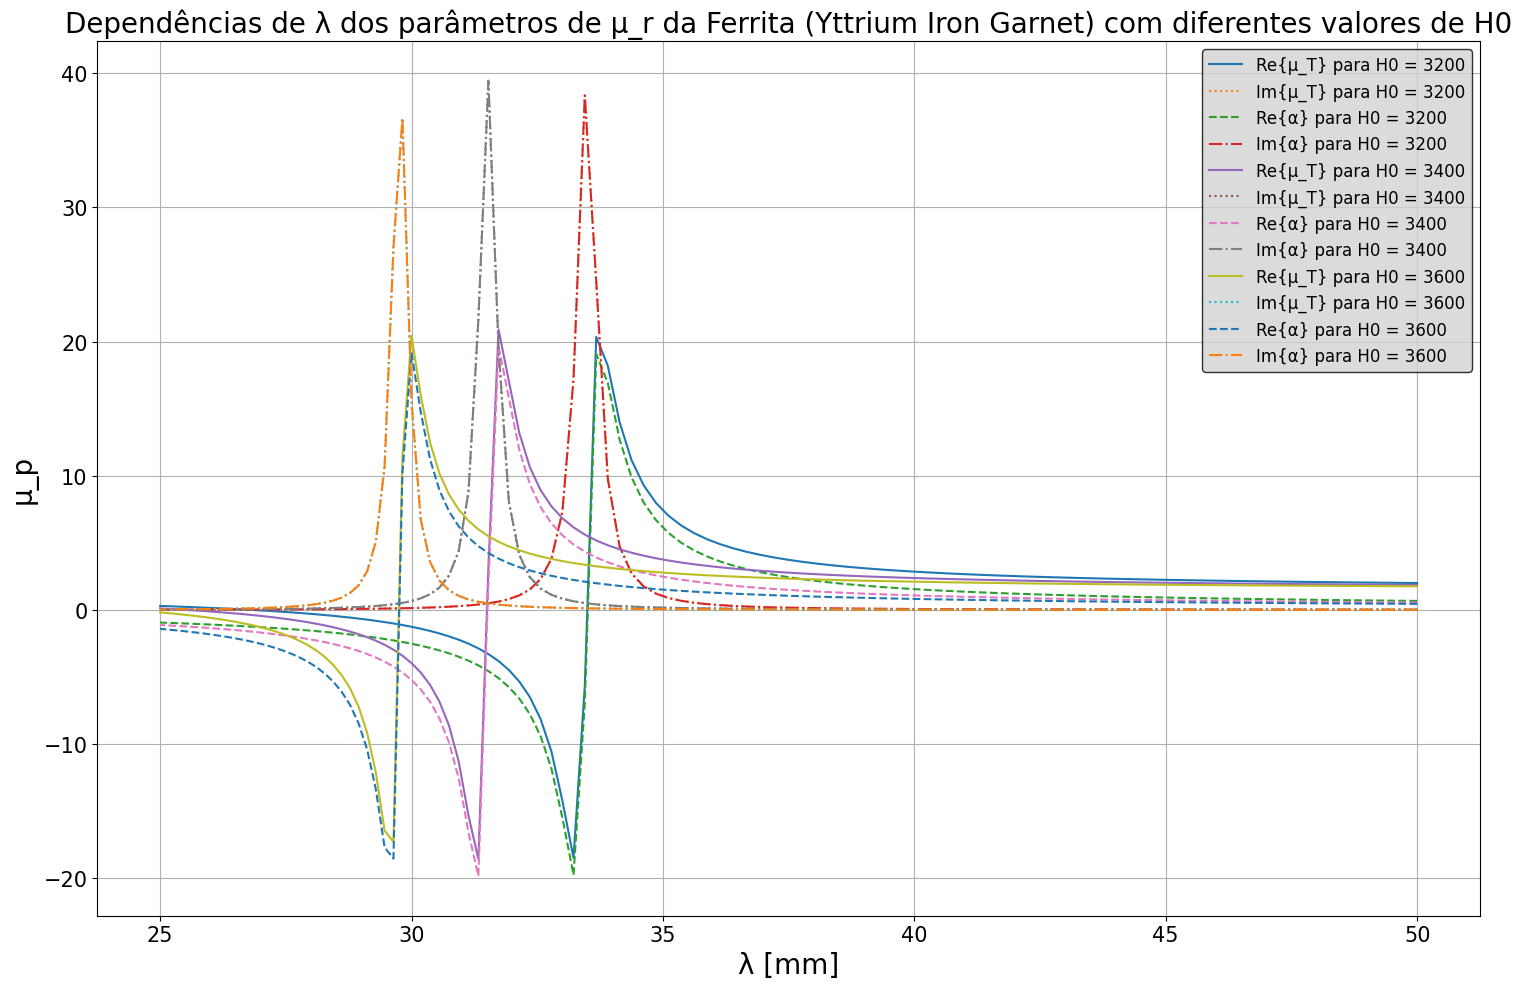

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
C = 3 * 10**8  # Velocidade da luz (m/s)
mi0 = 4 * np.pi * (10**(-7))  # Permeabilidade do vácuo
Epsilon_0 =  8.8541878176 * 10**(-12) # permissividade do vácuo  (F/m)
Gamma = 1.759 * (10**11)  # Gyromagnetic ratio (Ckg−1)

# Características do Yttrium Iron Garnet - Apêndice H do Livro do Pozar

# 4*π*10**(−3) oersted (Oe) = 1 (A/m)
H0_values = [3200, 3400, 3600]  # Valores de H0 para diferentes simulações (Oersteds)



Delta_H = 45  # Oersteds (Oe)
Delta_H = Delta_H * (1 /( 4 * np.pi *(10**(-3)))) #  (A/m)


# μ0* Ms weber/m2 = 10**−4 (4*π*Ms gauss)
M0 = 1780 / (4 * np.pi)   # Magnetização (G)
M0 = ((10**(-4))/(mi0))* (4 * np.pi) * M0 # Magnetização (weber/m2)

Mr = 1227 / (4 * np.pi)   # Magnetização permanente (G)
Mr = ((10**(-4))/(mi0))* (4 * np.pi) * Mr # Magnetização permanente (weber/m2)

Epsilon_p = 15  # Permissividade escalar
tan_delta = 0.0002 # loss tangent
Tc = 225  # Curie temperature

# Definindo a faixa de frequências e calculando omega e Lambda
Frequencia = np.linspace(6 * 10**9, 12 * 10**9, 100)  # Faixa de 6 GHz a 12 GHz
omega = 2 * np.pi * Frequencia  # Frequências angulares
Lambda = (C / Frequencia) * 10**3  # Convertendo Lambda para milímetros

# Configurando o gráfico
plt.figure(figsize=(15, 10))

# Loop para diferentes valores de H0
for H0_value in H0_values:
    # Convertendo H0 para (A/m)
    H0 = H0_value * (1 / (4 * np.pi * (10**(-3))))  # (A/m)

    # Cálculo de parâmetros
    b =  mi0 * Gamma * Delta_H / (2 * omega)  # Constante de amortecimento adimensional
    omega_m = mi0 * Gamma * M0  # Frequência de magnetização
    omega_0 =  mi0 * Gamma * H0  # Frequência de Larmor

    # Calculando os parâmetros com dependência de omega
    D = (((omega_0**2) - ((omega**2) * (1 + (b**2))))**2) + 4 * (omega_0**2) * (omega**2) * (b**2)
    X_1 = (omega_0 * omega_m * ((omega_0**2) - (omega**2) * (1 - (b**2)))) / D  # χ'
    X_2 = (omega * omega_m * b * ((omega_0**2) + (omega**2) * (1 + (b**2)))) / D  # χ''
    omega_1 = (omega * omega_m * ((omega_0**2) - (omega**2) * (1 + (b**2)))) / D  # Ω'
    omega_2 = (2 * (omega**2) * omega_0 * omega_m * b) / D  # Ω''

    # Definindo as variáveis complexas mi_T e alfa
    mi_T = 1 + X_1 + X_2 * 1j  # μ_T = 1 + χ' + iχ''
    alfa = omega_1 + omega_2 * 1j  # α = Ω' + iΩ''

    # Separando as partes reais e imaginárias
    mi_T_real = mi_T.real
    mi_T_imaginaria = mi_T.imag
    alfa_real = alfa.real
    alfa_imaginaria = alfa.imag

    # Plotando as curvas para o valor de H0 atual
    plt.plot(Lambda, mi_T_real, label=f'Re{{μ_T}} para H0 = {H0_value}', linestyle='solid')
    plt.plot(Lambda, mi_T_imaginaria, label=f'Im{{μ_T}} para H0 = {H0_value}', linestyle='dotted')
    plt.plot(Lambda, alfa_real, label=f'Re{{α}} para H0 = {H0_value}', linestyle='dashed')
    plt.plot(Lambda, alfa_imaginaria, label=f'Im{{α}} para H0 = {H0_value}', linestyle='dashdot')

# Configurações do gráfico
plt.title('Dependências de λ dos parâmetros de μ_r da Ferrita (Yttrium Iron Garnet) com diferentes valores de H0', fontsize=20)
plt.xlabel('λ [mm]', fontsize=20)
plt.ylabel('μ_p', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=12, frameon=True, facecolor='lightgrey', edgecolor='black')
plt.grid(True)
plt.tight_layout()
plt.show()
